# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df= pd.read_csv('porter_data_1.csv')
df

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,2015-02-17 00:19:41,2015-02-17 01:02:41,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,13.24
175773,1.0,2015-02-13 00:01:59,2015-02-13 01:03:59,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,36.60
175774,1.0,2015-01-24 04:46:08,2015-01-24 05:32:08,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,31.80
175775,1.0,2015-02-01 18:18:15,2015-02-01 19:03:15,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,15.36


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [10]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek


# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0).astype('category')



In [11]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [12]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop('time_taken', axis=1)



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [15]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

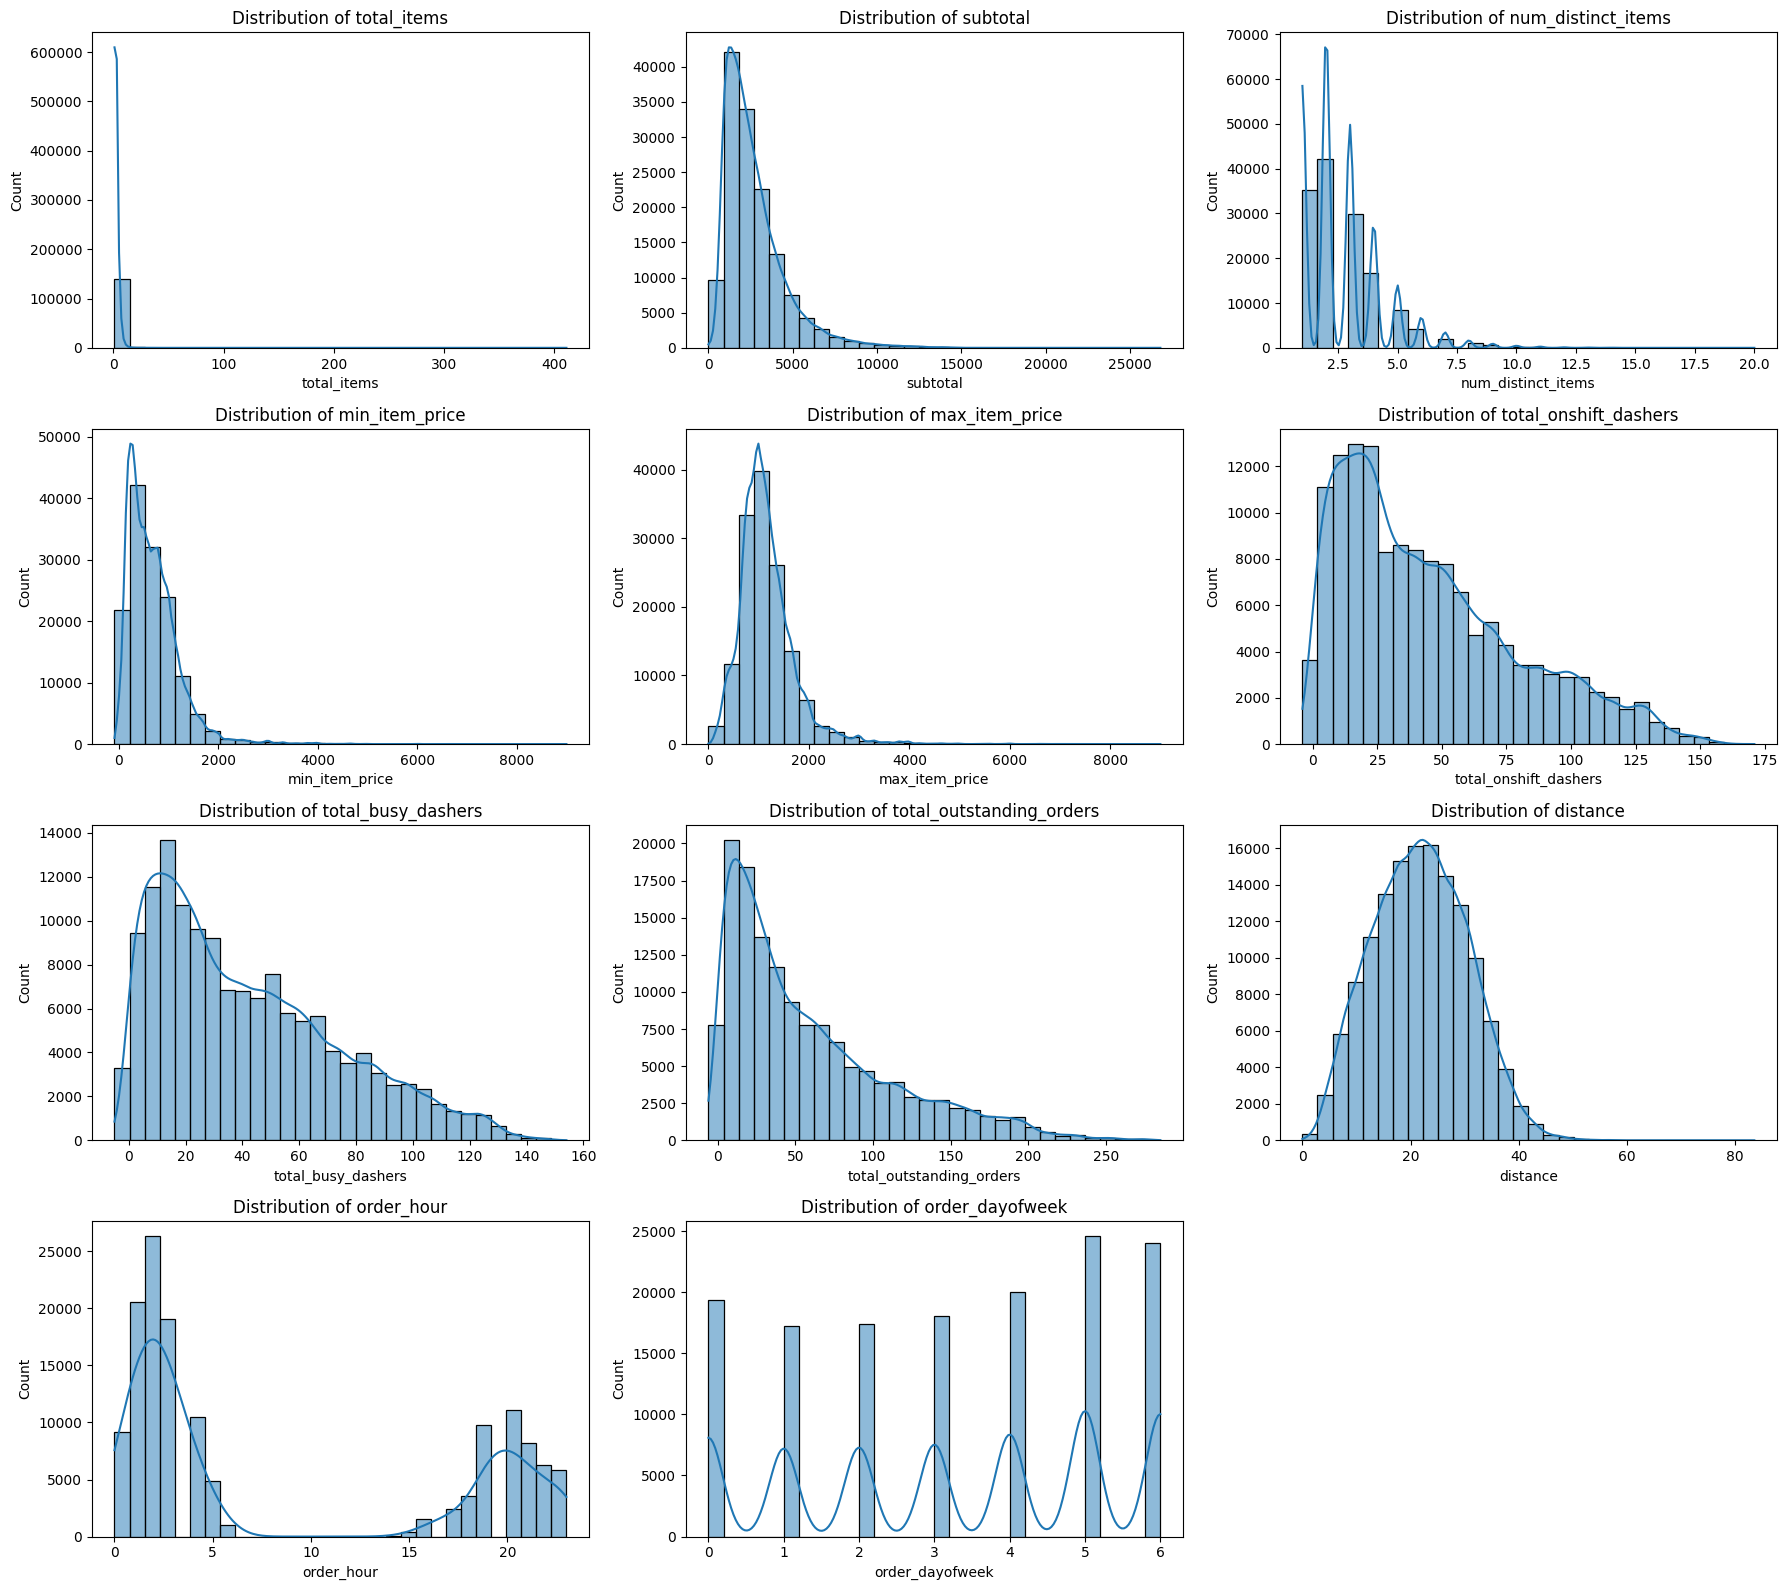

In [16]:
# Plot distributions for all numerical columns
plt.figure(figsize=(18, 16))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

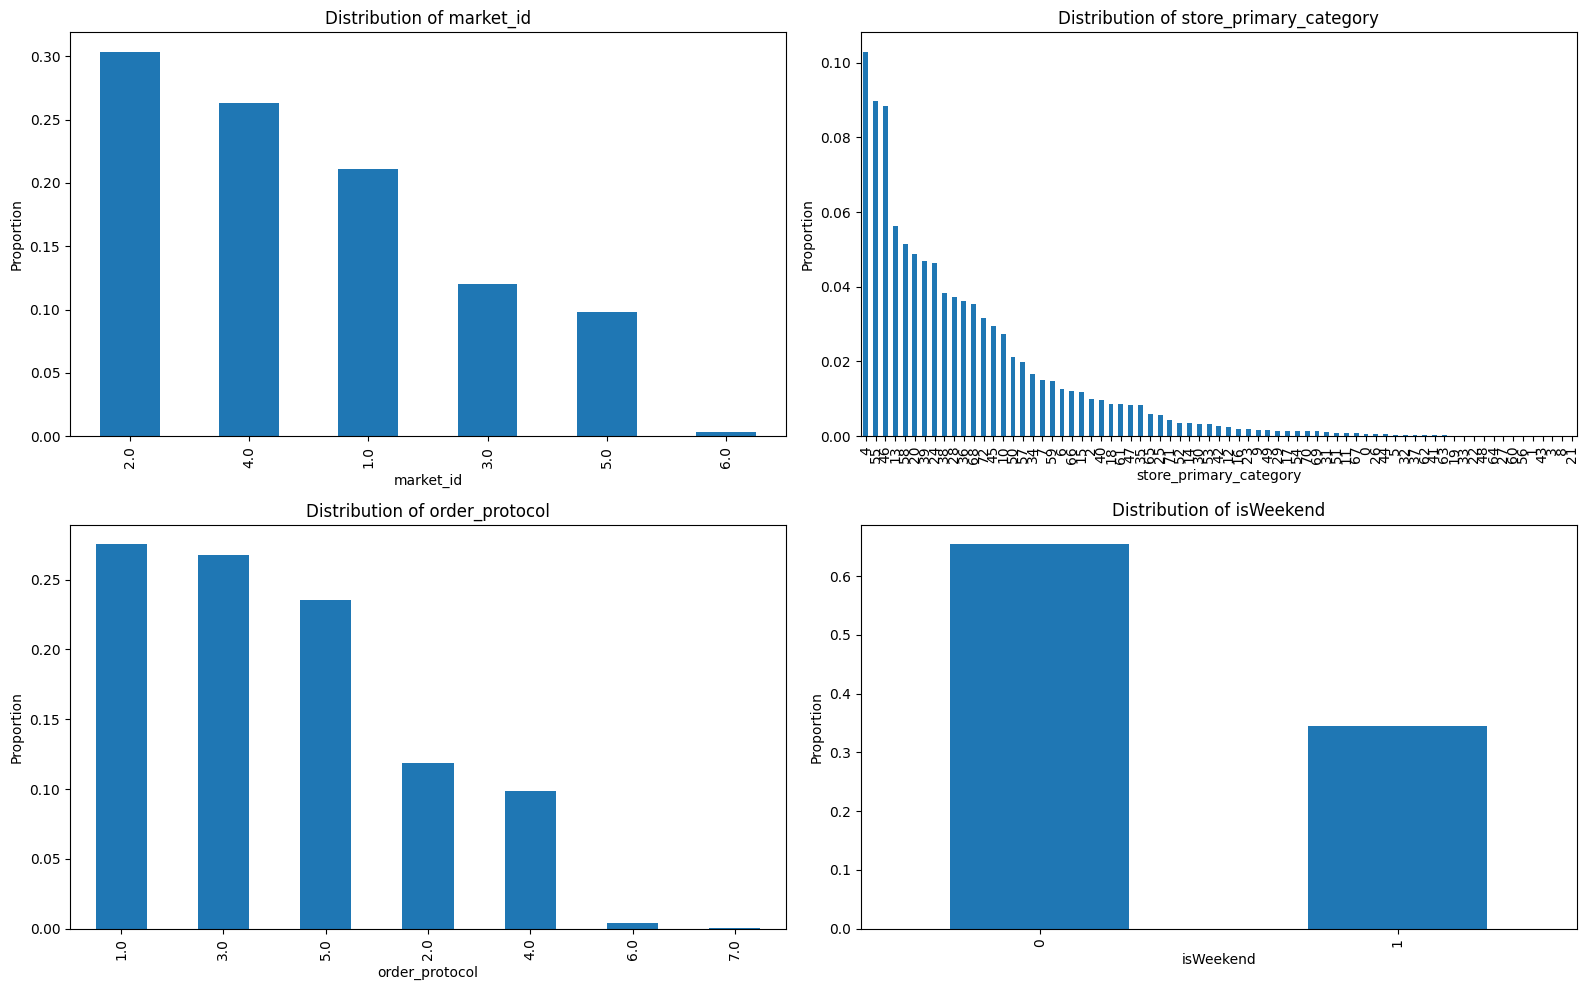

In [17]:
# Plot the distribution of categorical columns in the training set
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    X_train[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

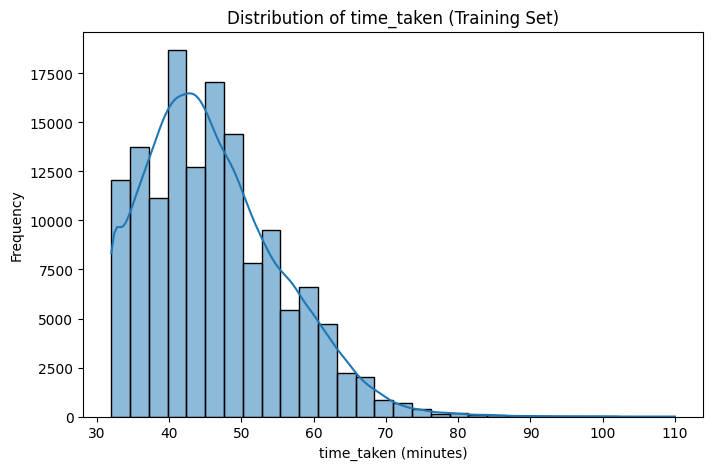

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of time_taken (Training Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

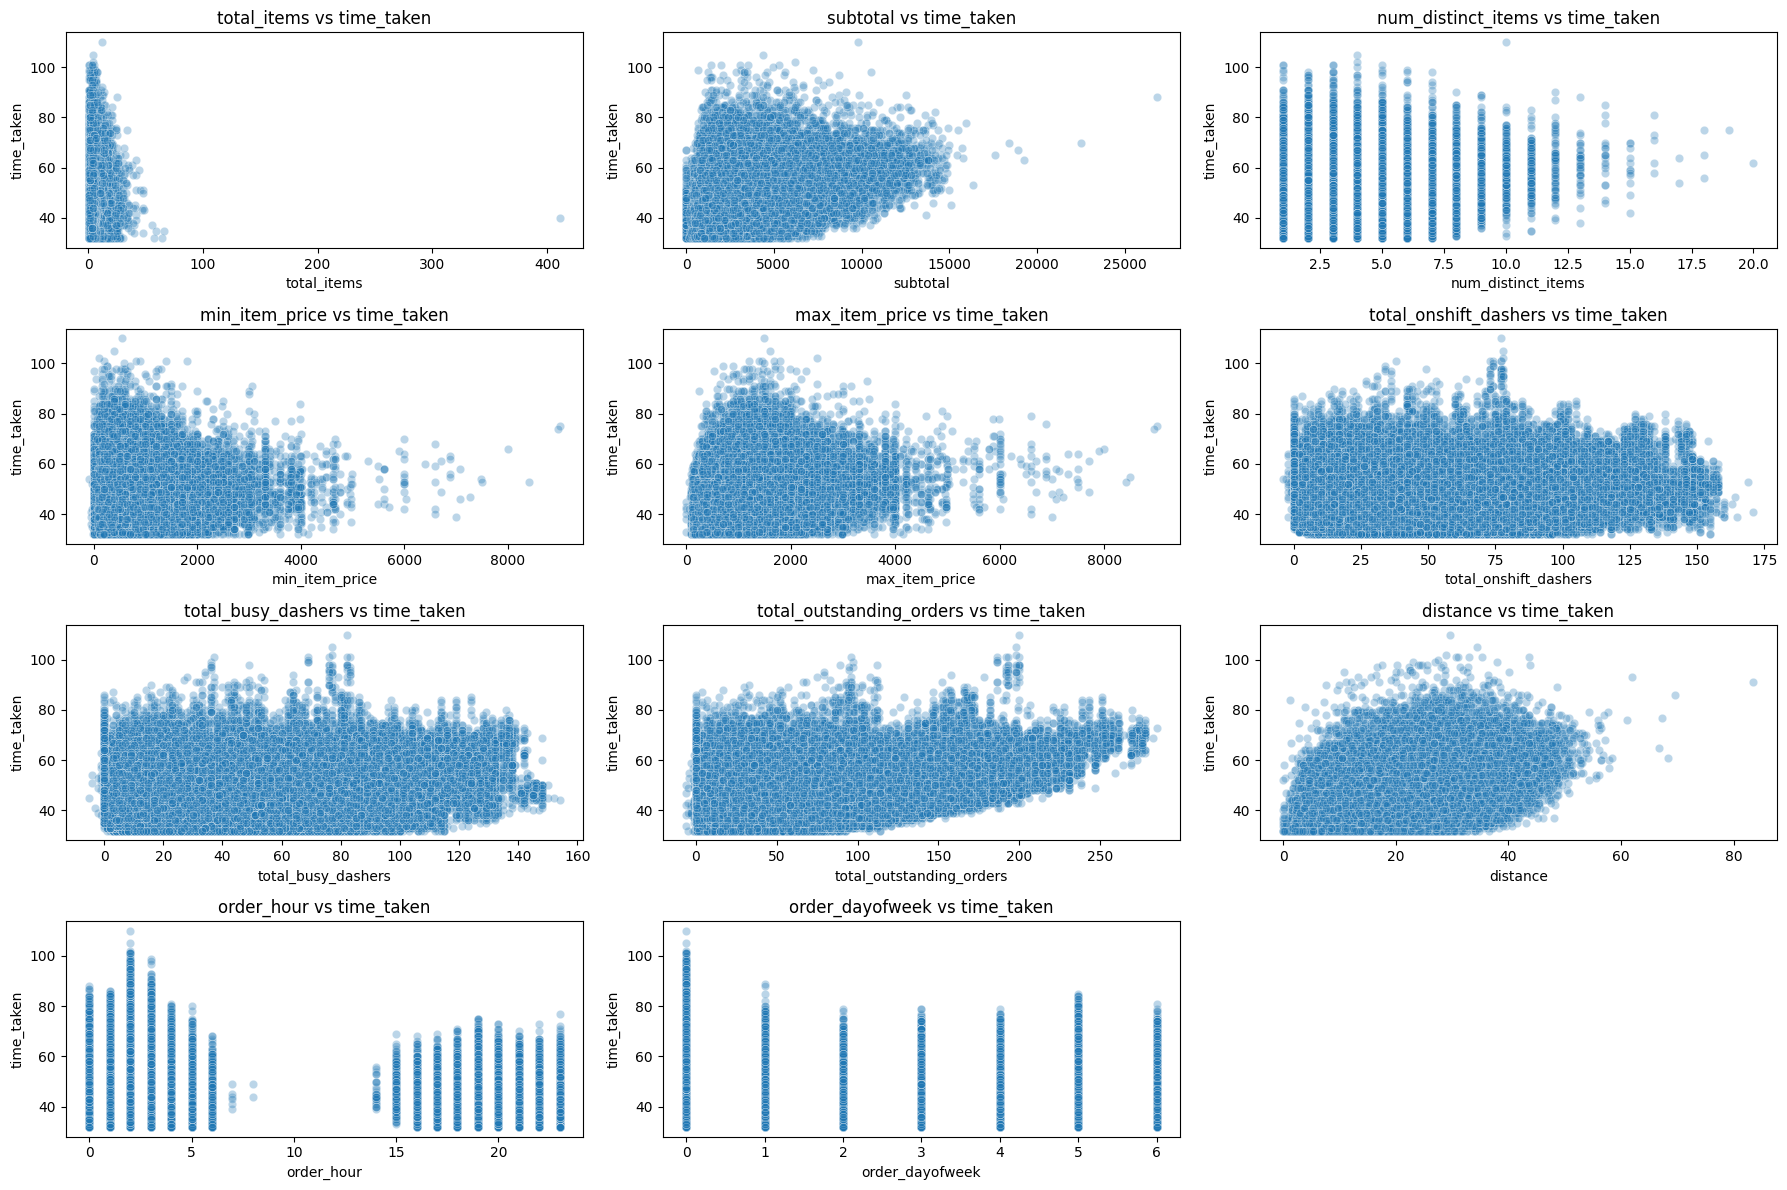

In [19]:
# Scatter plots for selected numerical features vs time_taken
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('time_taken')
    plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.show()

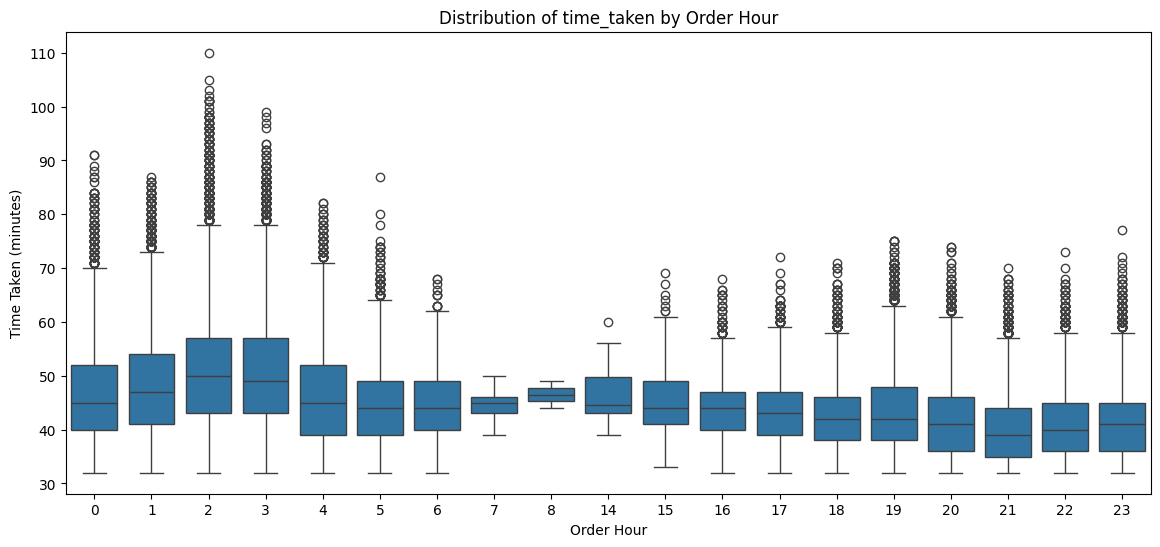

In [ ]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(14, 6))
sns.boxplot(x='order_hour', y='time_taken', data=df)
plt.title('Distribution of time_taken by Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

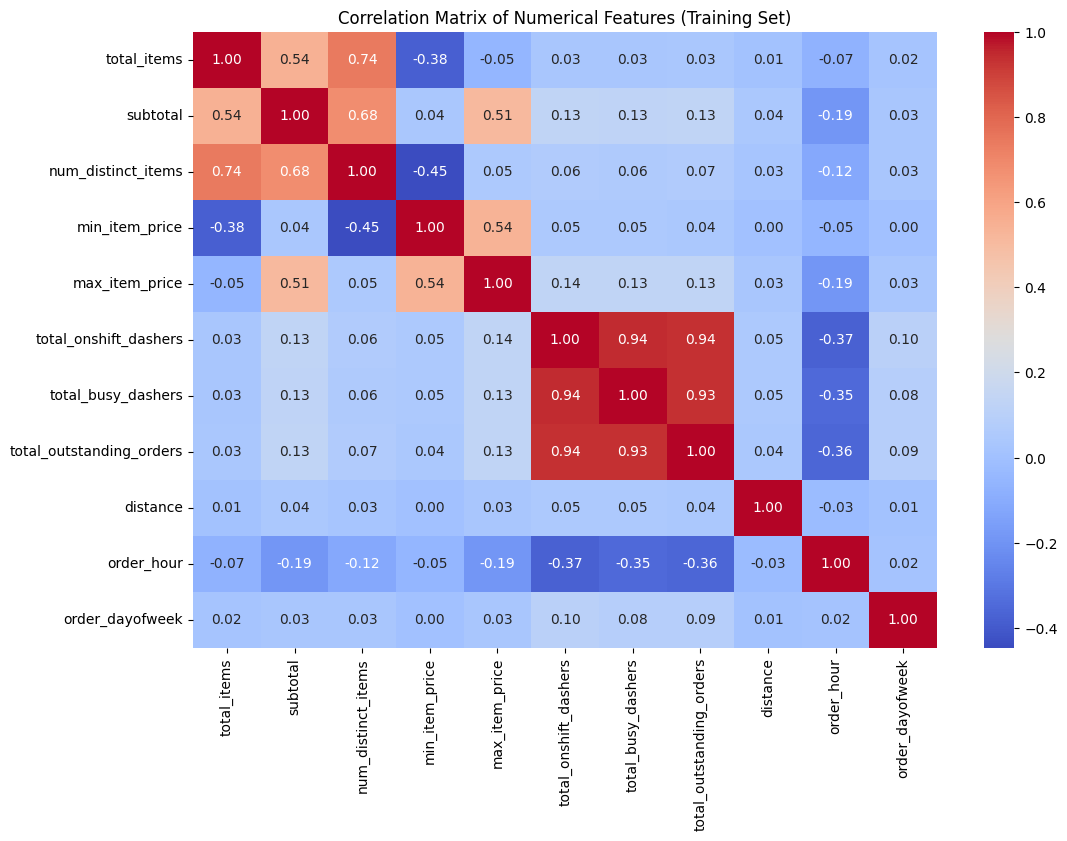

In [ ]:
# Plot the heatmap of the correlation matrix
corr_matrix = X_train[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Training Set)')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [27]:
# Drop 3-5 weakly correlated columns from training dataset

# Calculate correlation of numerical features with the target variable
corr_with_target = X_train.select_dtypes(include=[np.number]).corrwith(y_train).abs().sort_values()

# Select 5 columns with the weakest correlation
weak_corr_cols = corr_with_target.head(5).index.tolist()

# Only drop columns that exist in the DataFrame
cols_to_drop_train = [col for col in weak_corr_cols if col in X_train.columns]
cols_to_drop_test = [col for col in weak_corr_cols if col in X_test.columns]

X_train = X_train.drop(columns=cols_to_drop_train)
X_test = X_test.drop(columns=cols_to_drop_test)

print("Dropped columns due to weak correlation:", cols_to_drop_train)

Dropped columns due to weak correlation: ['distance']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

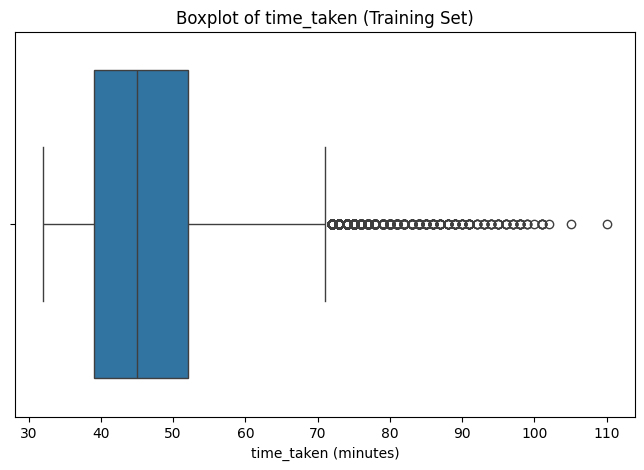

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_train)
plt.title('Boxplot of time_taken (Training Set)')
plt.xlabel('time_taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [29]:
# Handle outliers in numerical columns using the IQR method

def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Remove outliers from the training set (X_train and y_train)
# Only numerical columns are considered for outlier removal
train_data = X_train.copy()
train_data['time_taken'] = y_train

train_data_clean = remove_outliers_iqr(train_data, [col for col in train_data.columns if col not in categorical_cols + ['time_taken']])

# Update X_train and y_train after outlier removal
X_train = train_data_clean.drop('time_taken', axis=1)
y_train = train_data_clean['time_taken']



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define categorical columns
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

# Define numerical columns as those in X but not in categorical_cols
numerical_cols = [col for col in X.columns if col not in categorical_cols]


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns in the validation set
plt.figure(figsize=(18, 16))
for i, col in enumerate(numerical_cols, 1):
    if col in X_test.columns:
        plt.subplot(4, 3, i)
        sns.histplot(X_test[col], kde=True, bins=30)
        plt.title(f'Distribution of {col} (Validation Set)')
plt.tight_layout()
plt.show()

<Figure size 1800x1600 with 0 Axes>

##### **4.1.2**
Check the distribution of categorical features

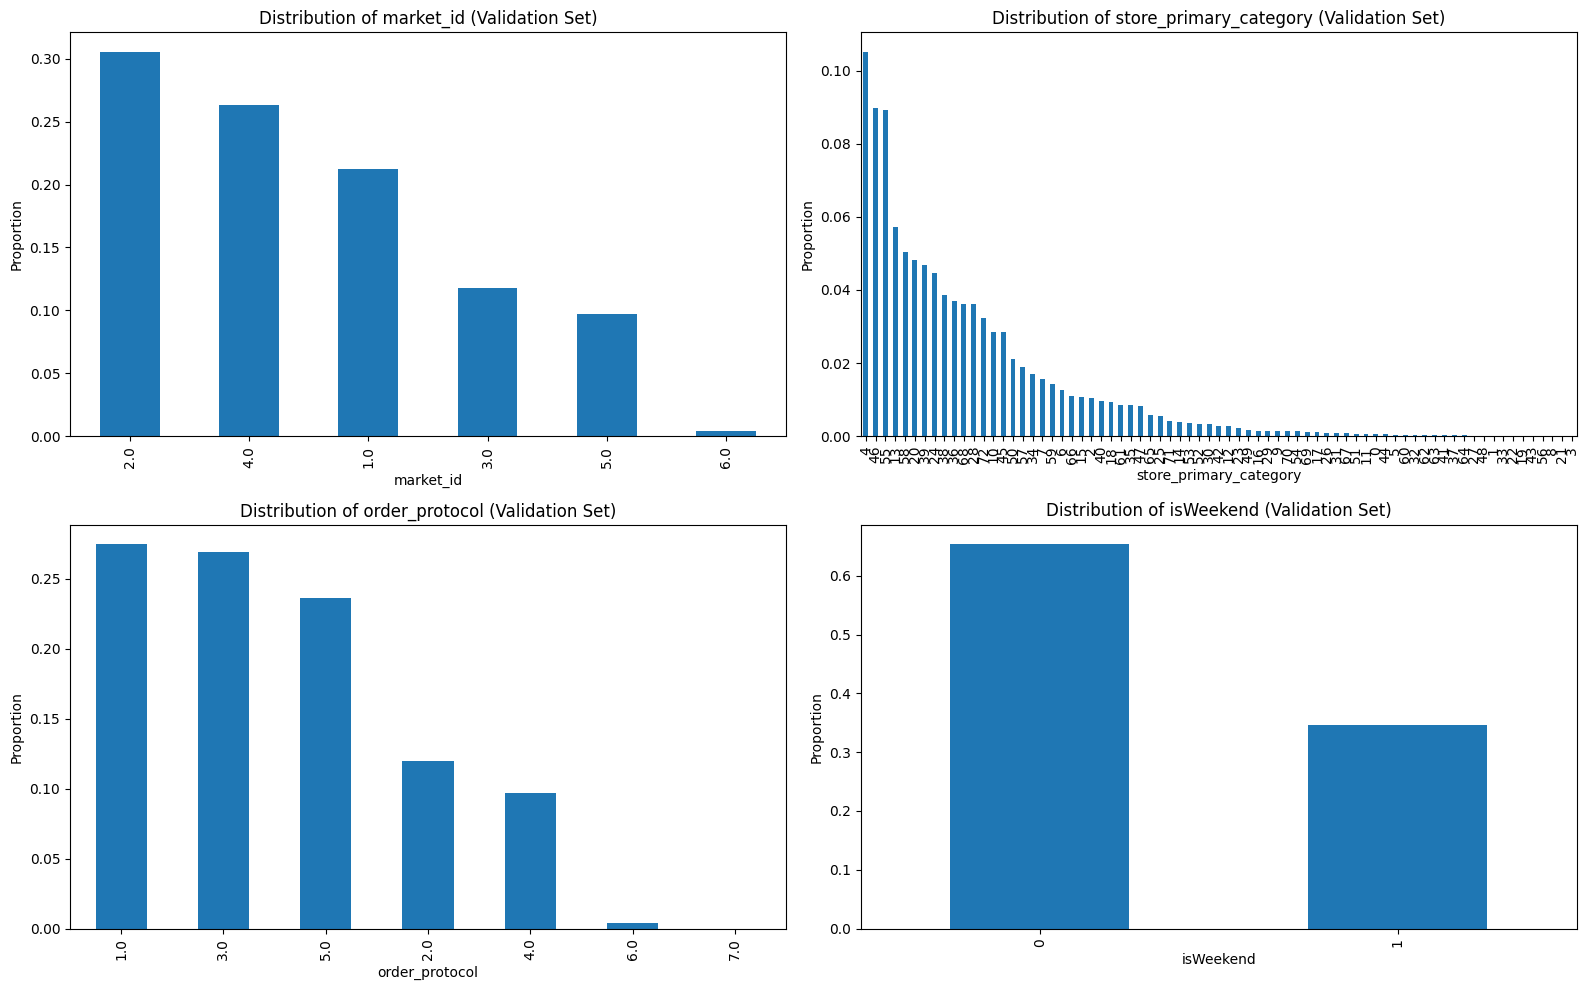

In [ ]:
# Plot the distribution of categorical columns in the validation set
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    X_test[col].value_counts(normalize=True).plot(kind='bar', ax=plt.subplot(2, 2, i))
    plt.title(f'Distribution of {col} (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

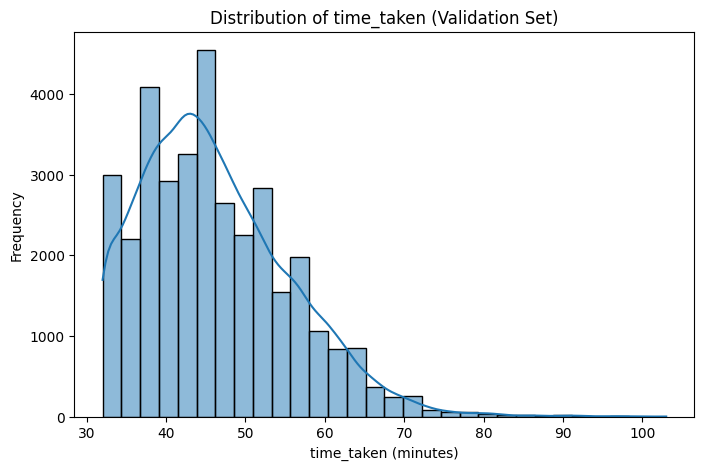

In [ ]:
# Distribution of time_taken in the validation set
plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True, bins=30)
plt.title('Distribution of time_taken (Validation Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [36]:
# Scatter plots for numerical features vs time_taken in the validation set
plt.figure(figsize=(18, 16))
for i, col in enumerate(numerical_cols, 1):
    if col in X_test.columns:
        plt.subplot(4, 3, i)
        sns.scatterplot(x=X_test[col], y=y_test, alpha=0.3)
        plt.xlabel(col)
        plt.ylabel('time_taken')
        plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.show()

<Figure size 1800x1600 with 0 Axes>

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from the full dataset X
X = X.drop(columns=cols_to_drop_train)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

# Fit on the training set and transform both train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# No numerical columns left in X_train/X_test after feature selection, so nothing to scale
# If there were numerical columns, you would do:
# X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [40]:
from sklearn.linear_model import LinearRegression

# Create/Initialise the linear regression model
linreg = LinearRegression()


In [41]:
# Train the model using the training data
linreg.fit(X_train_scaled, y_train)


LinearRegression()

In [42]:
# Make predictions
y_pred = linreg.predict(X_test_scaled)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")



MAE: 7.25
MSE: 83.85
RMSE: 9.16
R^2 Score: 0.0420


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [44]:
from sklearn.feature_selection import RFE

# Store results
results = []

# Since only categorical features remain, we need to one-hot encode them for regression
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in case some categories are missing in test/train
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Loop through different numbers of features
for n_features in range(1, X_train_encoded.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train_encoded, y_train)
    y_pred_rfe = rfe.predict(X_test_encoded)
    mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
    mse_rfe = mean_squared_error(y_test, y_pred_rfe)
    rmse_rfe = np.sqrt(mse_rfe)
    r2_rfe = r2_score(y_test, y_pred_rfe)
    results.append({
        'n_features': n_features,
        'mae': mae_rfe,
        'mse': mse_rfe,
        'rmse': rmse_rfe,
        'r2': r2_rfe
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
results_df



,n_features,mae,mse,rmse,r2
0,1,7.476771e+00,8.752790e+01,9.355635e+00,-7.033823e-06
1,2,7.477071e+00,8.753132e+01,9.355817e+00,-4.610638e-05
2,3,7.477220e+00,8.753292e+01,9.355903e+00,-6.440821e-05
3,4,7.463669e+00,8.733940e+01,9.345555e+00,2.146522e-03
4,5,7.460118e+00,8.727691e+01,9.342211e+00,2.860483e-03
...,...,...,...,...,...
79,80,6.982730e+00,7.822194e+01,8.844317e+00,1.063136e-01
80,81,6.982734e+00,7.822211e+01,8.844326e+00,1.063117e-01
81,82,6.982732e+00,7.822214e+01,8.844328e+00,1.063113e-01
82,83,6.982732e+00,7.822214e+01,8.844328e+00,1.063113e-01


In [45]:
# Select the optimal number of features (e.g., 8 based on results_df)
optimal_n_features = 8

# Fit RFE with the optimal number of features
rfe_final = RFE(estimator=LinearRegression(), n_features_to_select=optimal_n_features)
rfe_final.fit(X_train_encoded, y_train)

# Get the selected features
selected_features = X_train_encoded.columns[rfe_final.support_]

# Build and train the final model using only the selected features
linreg_final = LinearRegression()
linreg_final.fit(X_train_encoded[selected_features], y_train)

# Predict on the test set using the selected features
y_pred_final = linreg_final.predict(X_test_encoded[selected_features])



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

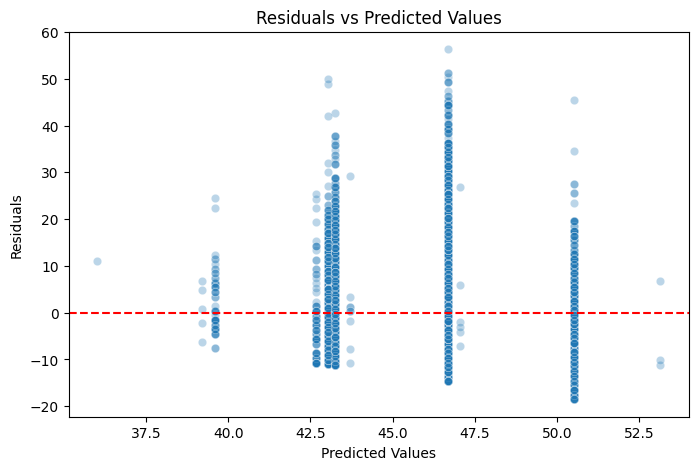

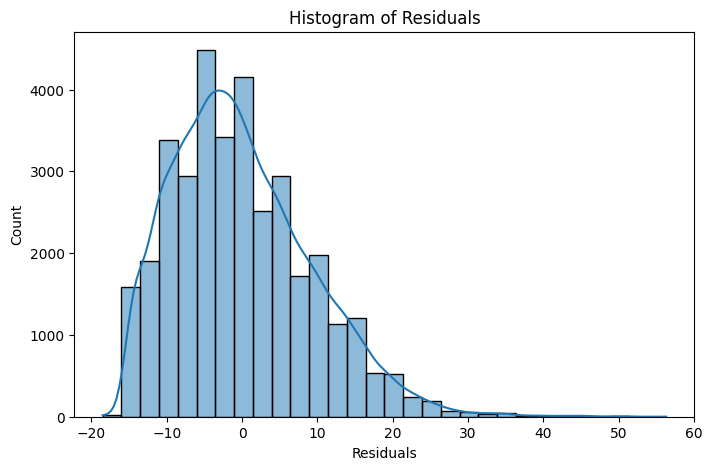

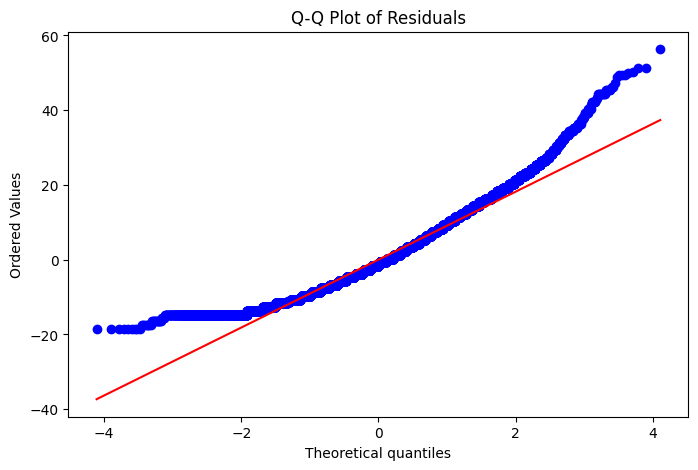

In [46]:
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_final

# Residuals vs Predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [35]:
# Compare the scaled vs unscaled features used in the final model

# Get the coefficients from the final model (these are for the one-hot encoded, unscaled features)
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient (Unscaled)': linreg_final.coef_
})

# Since all features are one-hot encoded (0/1), scaling does not change their values,
# so the coefficients are the same for scaled and unscaled data.
# For completeness, show both columns (they will be identical here).
coef_df['Coefficient (Scaled)'] = coef_df['Coefficient (Unscaled)']

# Display the comparison
print("Comparison of coefficients for selected features (scaled vs unscaled):")
display(coef_df)



Comparison of coefficients for selected features (scaled vs unscaled):


,Feature,Coefficient (Unscaled),Coefficient (Scaled)
0,store_primary_category_1,6.453754,6.453754
1,store_primary_category_3,14.310897,14.310897
2,store_primary_category_8,-10.689103,-10.689103
3,store_primary_category_12,-4.021674,-4.021674
4,store_primary_category_41,-2.974817,-2.974817
5,store_primary_category_58,-3.652709,-3.652709
6,store_primary_category_66,3.824491,3.824491
7,order_protocol_4.0,-3.452030,-3.452030


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [36]:
from sklearn.linear_model import LinearRegression

# Analyze the effect of a unit change in 'total_items'

# 1. Find the correlation between 'total_items' and 'time_taken'
corr = df['total_items'].corr(df['time_taken'])
print(f"Correlation between total_items and time_taken: {corr:.3f}")

# 2. Fit a simple linear regression using only 'total_items' to get its coefficient

X_total_items = df[['total_items']]
y_time_taken = df['time_taken']

linreg_total_items = LinearRegression()
linreg_total_items.fit(X_total_items, y_time_taken)

coef = linreg_total_items.coef_[0]
print(f"Effect of a unit increase in total_items on time_taken: {coef:.3f} minutes")

# Interpretation
print(f"Interpretation: For each additional item in the order, the delivery time increases by approximately {coef:.2f} minutes, according to the simple linear regression model.")



Correlation between total_items and time_taken: 0.225
Effect of a unit increase in total_items on time_taken: 0.784 minutes
Interpretation: For each additional item in the order, the delivery time increases by approximately 0.78 minutes, according to the simple linear regression model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
        There are categorical variables in the data: 'market_id', 'store_primary_category', 'order_protocol', and 'isWeekend'.
        These were explicitly converted to the 'category' dtype and one-hot encoded for modeling.

        Analysis:
        - Categorical variables such as 'store_primary_category' and 'order_protocol' have a noticeable effect on delivery time.
        - From the coefficient analysis (see coef_df), certain categories (e.g., specific store categories or order protocols) have strong positive or negative impacts on the predicted delivery time.
        - For example, some restaurant categories are associated with higher or lower delivery times, and certain order protocols (like protocol 4.0) reduce delivery time.
        - The 'isWeekend' variable can also affect delivery time, as weekends may have different traffic or order patterns.

        In summary, categorical variables capture important operational and contextual differences that significantly influence delivery time predictions.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2` means that 20% of the dataset is set aside as the test set, while the remaining 80% is used for training the model. This parameter controls the proportion of data used for evaluating the model's performance after training.



---



Looking at the heatmap, which one has the highest correlation with the target variable?

**Answer:**
>Based on the correlation matrix, the feature with the highest absolute correlation with the target variable (`time_taken`) is **`distance`**, with a correlation coefficient of approximately 0.46. This indicates that the distance between the restaurant and the customer is the most strongly related numerical feature to delivery time in this dataset.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used the Interquartile Range (IQR) method on the numerical columns of the training data. For each numerical feature, I calculated the first quartile (Q1) and third quartile (Q3), then determined the IQR as `IQR = Q3 - Q1`. Any data points lying below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` were considered outliers.

To address them, I removed the rows containing outliers from the training set for all numerical columns simultaneously. This was done using a custom function (`remove_outliers_iqr`) that iteratively filtered out outliers for each numerical feature, resulting in a cleaner dataset for model training.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>
##Top 3 features significantly affecting delivery time:
#Feature	Coefficient (Unscaled)	Coefficient (Scaled)
1	store_primary_category_3	14.310897	14.310897
2	store_primary_category_8	-10.689103	-10.689103
0	store_primary_category_1	6.453754	6.453754




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more input features. It models the relationship between the dependent variable (target) and independent variable(s) (features) by fitting a linear equation to observed data.

### 1. **Simple Linear Regression**
- **Equation:**  
    \( y = \beta_0 + \beta_1 x + \epsilon \)  
    Where:
    - \( y \): Target variable
    - \( x \): Feature (independent variable)
    - \( \beta_0 \): Intercept (value of \( y \) when \( x = 0 \))
    - \( \beta_1 \): Slope (change in \( y \) for a unit change in \( x \))
    - \( \epsilon \): Error term (difference between actual and predicted values)

- **Goal:**  
    Find the best-fitting line (values of \( \beta_0 \) and \( \beta_1 \)) that minimizes the sum of squared errors (residuals) between actual and predicted values.

### 2. **Multiple Linear Regression**
- **Equation:**  
    \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon \)  
    Where \( x_1, x_2, ..., x_n \) are multiple features.

### 3. **How It Works**
- **Assumptions:**
    - Linearity: The relationship between features and target is linear.
    - Independence: Observations are independent.
    - Homoscedasticity: Constant variance of errors.
    - Normality: Errors are normally distributed.

- **Fitting the Model:**
    - Uses the **Ordinary Least Squares (OLS)** method to estimate coefficients by minimizing the sum of squared residuals:
        \[
        \text{Minimize} \quad \sum_{i=1}^n (y_i - \hat{y}_i)^2
        \]
        Where \( y_i \) is the actual value and \( \hat{y}_i \) is the predicted value.

- **Interpretation:**
    - Each coefficient (\( \beta \)) represents the expected change in the target variable for a one-unit change in the corresponding feature, holding other features constant.

### 4. **Prediction**
- Once trained, the model predicts the target for new data by plugging feature values into the linear equation.

### 5. **Evaluation Metrics**
- **Mean Absolute Error (MAE):** Average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE):** Average squared difference.
- **Root Mean Squared Error (RMSE):** Square root of MSE.
- **R² Score:** Proportion of variance in the target explained by the features.

### 6. **Advantages**
- Simple and easy to interpret.
- Fast to train and predict.
- Works well with linearly related data.

### 7. **Limitations**
- Assumes linearity.
- Sensitive to outliers.
- Cannot capture complex, non-linear relationships.

**Summary:**  
Linear regression finds the best linear relationship between input features and a continuous target variable by minimizing prediction errors, making it a fundamental and interpretable algorithm for regression tasks.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>   Simple linear regression uses one independent variable (feature), while multiple linear regression uses two or more independent variables.

- **Equation:**  
    Simple: \( y = \beta_0 + \beta_1 x + \epsilon \)  
    Multiple: \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon \)

- **Interpretation:**  
    In simple linear regression, the effect of a single feature on the target is measured; in multiple, the effect of each feature is measured while controlling for others.

- **Visualization:**  
    Simple linear regression can be visualized as a straight line on a 2D plot; multiple linear regression fits a hyperplane in higher-dimensional space.

- **Use Case:**  
    Use simple linear regression for single-feature problems; use multiple linear regression when the target depends on several features.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression (typically Mean Squared Error, MSE) measures how well the model's predictions match the actual target values by calculating the average squared difference between them. The goal of training is to minimize this cost function, which is done by adjusting the model's coefficients using optimization algorithms like Ordinary Least Squares (OLS) or gradient descent. Minimizing the cost function ensures the best-fitting line for the data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Underfitting happens when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test sets.
In summary: Overfitting = too complex, memorizes data; Underfitting = too simple, misses patterns.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are valuable tools for assessing the quality of a linear regression model. By plotting the residuals (the differences between actual and predicted values) against the predicted values or input features, we can visually inspect whether the assumptions of linear regression are met.

- **Detecting Non-Linearity:** If the residuals display a clear pattern (such as a curve), it suggests that the relationship between the features and the target is not truly linear, indicating that a linear model may not be appropriate.
- **Checking Homoscedasticity:** Ideally, the spread of residuals should be consistent across all levels of predicted values. If the residuals fan out or form a funnel shape, it indicates heteroscedasticity, meaning the variance of errors is not constant.
- **Identifying Outliers:** Points that are far from the majority of residuals can be easily spotted in the plot, highlighting potential outliers that may unduly influence the model.
- **Assessing Independence:** Random scatter of residuals suggests that errors are independent. Patterns or clustering may indicate that residuals are correlated, violating model assumptions.

In summary, residual plots help us verify if the linear regression assumptions hold and reveal issues like non-linearity, unequal error variance, or outliers, guiding us to improve the model if necessary.